In [1]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv("archive(1)/final_hateXplain.csv")
df.head()

,comment,label,Race,Religion,Gender,Sexual Orientation,Miscellaneous
0,0 u0 lmao wow fuck you too 😂 😂,normal,No_race,Nonreligious,No_gender,No_orientation,NaN
1,1 0 th floor maybe wow cnn with the fakenews t...,offensive,No_race,Nonreligious,No_gender,No_orientation,Other
2,1 0 yrs <number> white women raped by niggers ...,hatespeech,African,Nonreligious,No_gender,No_orientation,NaN
3,1 2 h ago ching chong accepted your friend req...,offensive,Asian,Nonreligious,No_gender,No_orientation,NaN
4,1 8 th century mayhem and lawlessness had noth...,normal,No_race,Nonreligious,No_gender,No_orientation,NaN


In [4]:
# Check for missing values
df.isnull().sum()


comment                   0
label                     0
Race                      0
Religion                  0
Gender                    0
Sexual Orientation        0
Miscellaneous         16576
dtype: int64

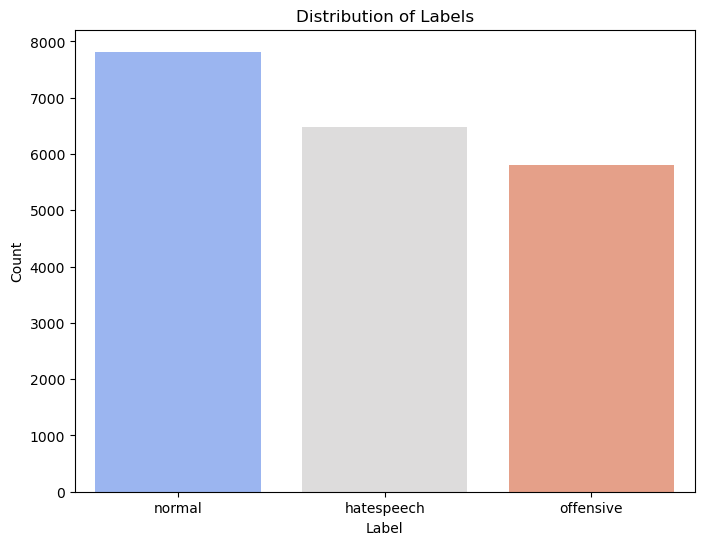

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of labels
label_counts = df['label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='coolwarm')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


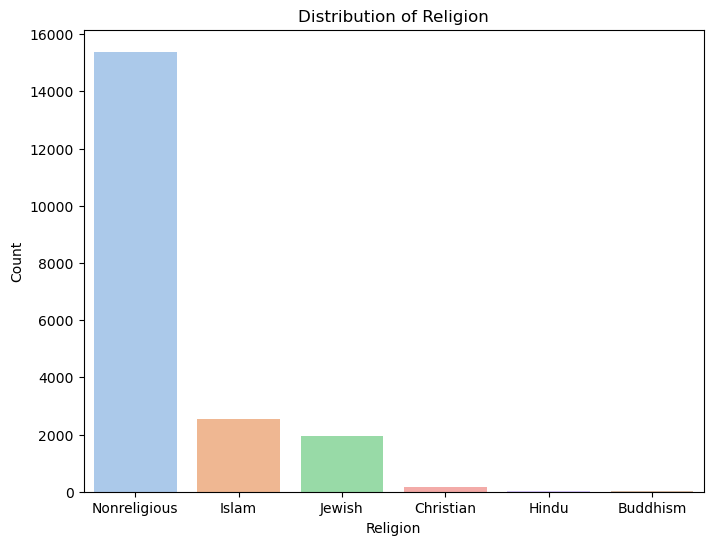

In [7]:
# Distribution of Religion
religion_counts = df['Religion'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=religion_counts.index, y=religion_counts.values, palette='pastel')
plt.title('Distribution of Religion')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.show()


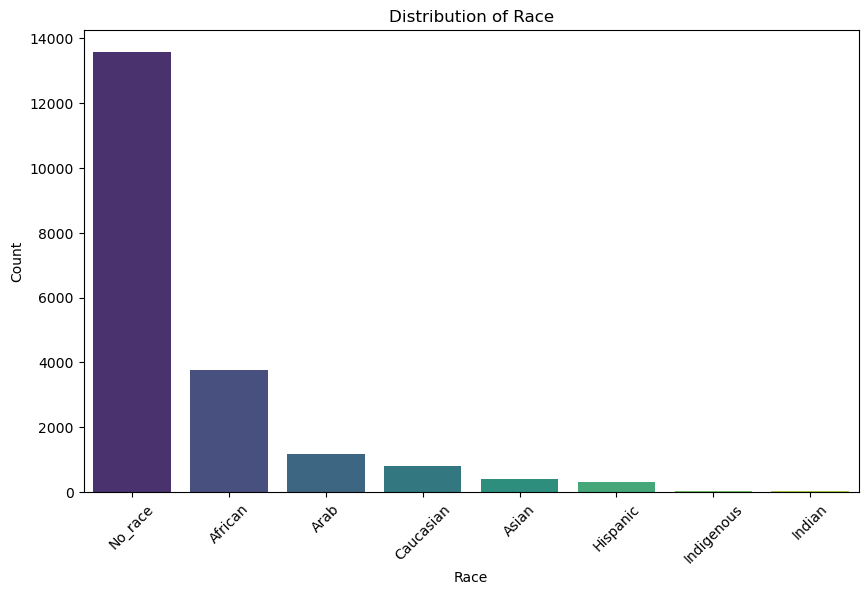

In [8]:
# Distribution of Race
race_counts = df['Race'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


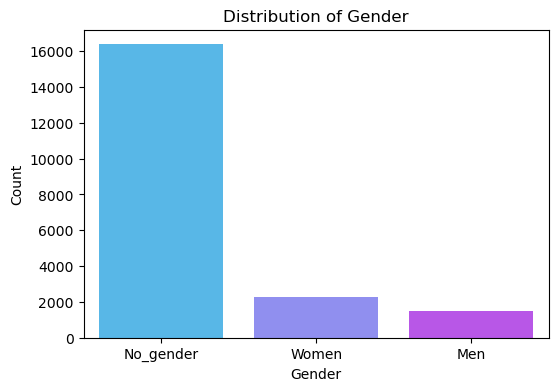

In [9]:
# Distribution of Gender
gender_counts = df['Gender'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='cool')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


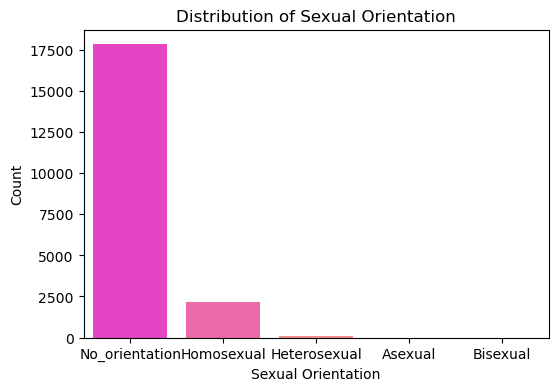

In [10]:
# Distribution of Sexual Orientation
orientation_counts = df['Sexual Orientation'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=orientation_counts.index, y=orientation_counts.values, palette='spring')
plt.title('Distribution of Sexual Orientation')
plt.xlabel('Sexual Orientation')
plt.ylabel('Count')
plt.show()


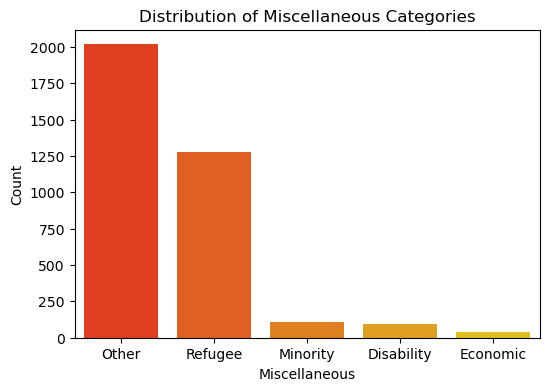

In [11]:
# Distribution of Miscellaneous
misc_counts = df['Miscellaneous'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=misc_counts.index, y=misc_counts.values, palette='autumn')
plt.title('Distribution of Miscellaneous Categories')
plt.xlabel('Miscellaneous')
plt.ylabel('Count')
plt.show()


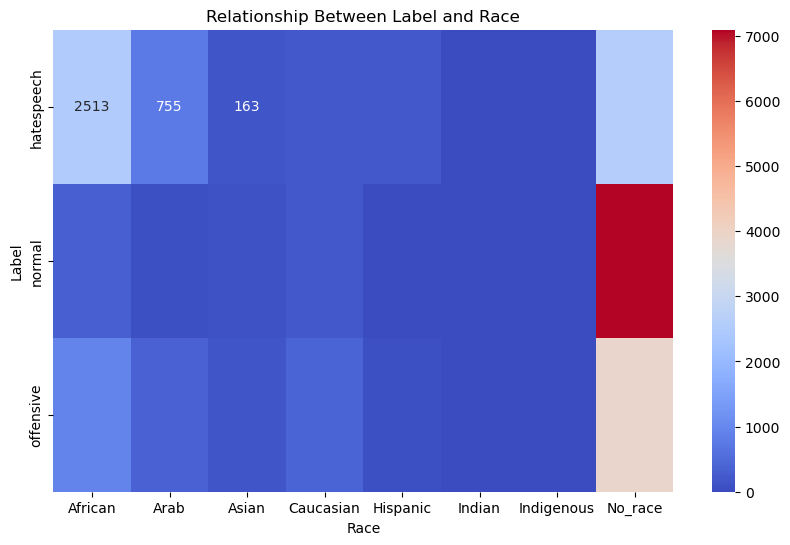

In [13]:

# Cross-tabulation of Label and Race
label_race_ct = pd.crosstab(df['label'], df['Race'])

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(label_race_ct, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship Between Label and Race')
plt.xlabel('Race')
plt.ylabel('Label')
plt.show()


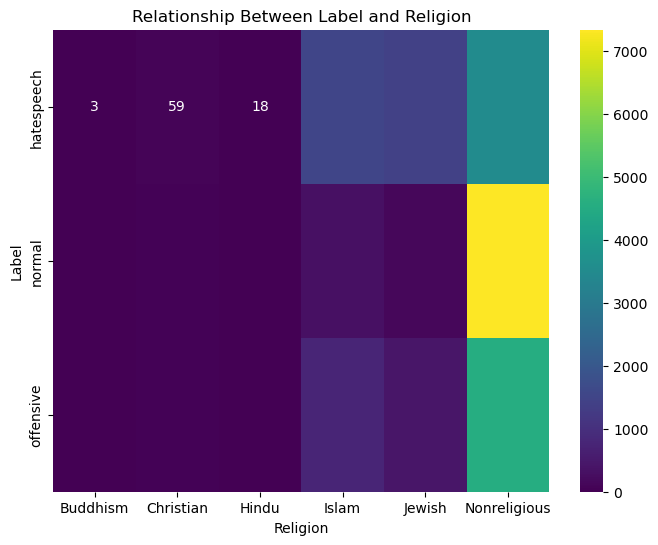

In [14]:
# Cross-tabulation of Label and Religion
label_religion_ct = pd.crosstab(df['label'], df['Religion'])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(label_religion_ct, annot=True, cmap='viridis', fmt='d')
plt.title('Relationship Between Label and Religion')
plt.xlabel('Religion')
plt.ylabel('Label')
plt.show()


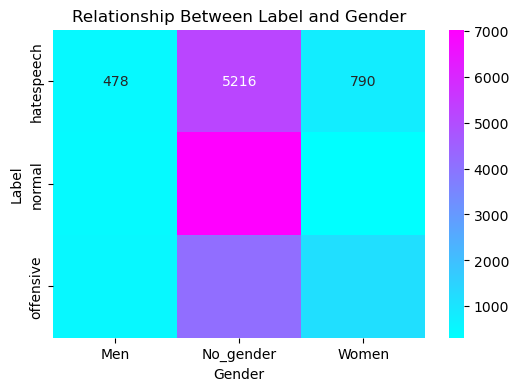

In [15]:
# Cross-tabulation of Label and Gender
label_gender_ct = pd.crosstab(df['label'], df['Gender'])

# Plotting
plt.figure(figsize=(6, 4))
sns.heatmap(label_gender_ct, annot=True, cmap='cool', fmt='d')
plt.title('Relationship Between Label and Gender')
plt.xlabel('Gender')
plt.ylabel('Label')
plt.show()


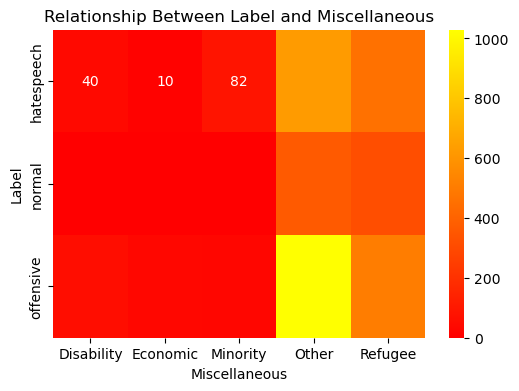

In [16]:
# Cross-tabulation of Label and Miscellaneous
label_misc_ct = pd.crosstab(df['label'], df['Miscellaneous'])

# Plotting
plt.figure(figsize=(6, 4))
sns.heatmap(label_misc_ct, annot=True, cmap='autumn', fmt='d')
plt.title('Relationship Between Label and Miscellaneous')
plt.xlabel('Miscellaneous')
plt.ylabel('Label')
plt.show()


In [17]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 535.8 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 807.1 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 850.1 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 919.0 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 883.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


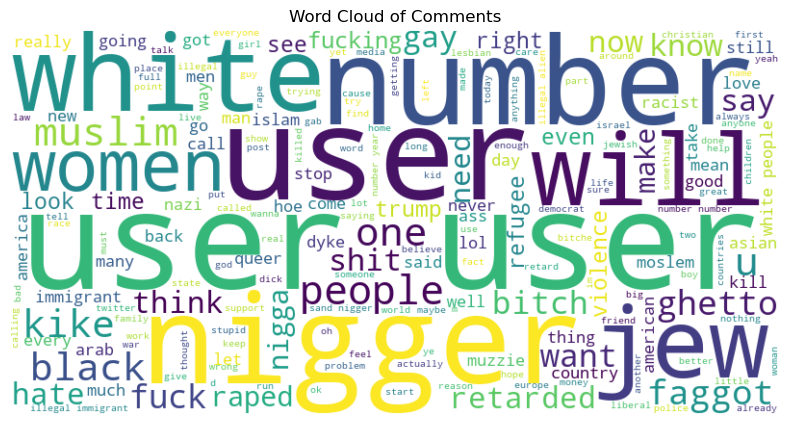

In [18]:
from wordcloud import WordCloud

# Concatenate all comments into a single string
all_comments = ' '.join(df['comment'].values)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Plotting
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()


In [19]:
import spacy
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [27]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    doc = nlp(text)  # Process text with spaCy
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    clean_text = ' '.join(tokens)  # Join tokens back into a single string
    return clean_text

label_mapping = {
    "normal": 1,
    "offensive": 2,
    "hatespeech": 3
}

inverse_label_mapping = {v: k for k, v in label_mapping.items()}

In [21]:
df['clean_comment'] = df['comment'].apply(preprocess_text)

In [28]:
df['encoded_label'] = df['label'].map(label_mapping)
X_train, X_test, y_train, y_test = train_test_split(df['clean_comment'], df['encoded_label'], test_size=0.3, random_state=42)

In [24]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([

    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])


In [29]:
# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Decode labels for evaluation
y_test_decoded = [inverse_label_mapping[label] for label in y_test]
y_pred_decoded = [inverse_label_mapping[label] for label in y_pred]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded))

Accuracy: 0.605834576495939

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.72      0.66      2282
           2       0.49      0.35      0.41      1751
           3       0.66      0.70      0.68      2000

    accuracy                           0.61      6033
   macro avg       0.59      0.59      0.58      6033
weighted avg       0.59      0.61      0.60      6033



In [30]:
# Prediction function
def predict_sentiment(comment):
    clean_comment = preprocess_text(comment)
    comment_vector = pipeline.named_steps['vectorizer'].transform([clean_comment])
    prediction = pipeline.named_steps['classifier'].predict(comment_vector)
    return inverse_label_mapping[prediction[0]]

In [32]:
test_comment = "Shut up."
print(f"Sentiment of the comment: {predict_sentiment(test_comment)}")

Sentiment of the comment: hatespeech


In [42]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100))
])


In [43]:
# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Decode labels for evaluation
y_test_decoded = [inverse_label_mapping[label] for label in y_test]
y_pred_decoded = [inverse_label_mapping[label] for label in y_pred]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_decoded, y_pred_decoded))
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded))

Accuracy: 0.6361677440742582

Classification Report:
               precision    recall  f1-score   support

  hatespeech       0.75      0.66      0.70      2000
      normal       0.59      0.83      0.69      2282
   offensive       0.59      0.35      0.44      1751

    accuracy                           0.64      6033
   macro avg       0.64      0.61      0.61      6033
weighted avg       0.64      0.64      0.62      6033



In [44]:
# Prediction function
def predict_sentiment(comment):
    clean_comment = preprocess_text(comment)
    comment_vector = pipeline.named_steps['vectorizer'].transform([clean_comment])
    prediction = pipeline.named_steps['classifier'].predict(comment_vector)
    return inverse_label_mapping[prediction[0]]

In [50]:
test_comment = "bitch"
print(f"Sentiment of the comment: {predict_sentiment(test_comment)}")

Sentiment of the comment: normal
